In [65]:
from keras.models import Sequential, load_model
from keras import Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [82]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
Y_train = pd.get_dummies(Y_test).values
Y_test = pd.get_dummies(Y_test).values

X_train=X_train.astype(float)/255
X_test=X_test.astype(float)/255

In [83]:
model = load_model('keras_model_neural_network.h5')

In [84]:
np.shape(Y_train)

(10000, 10)

In [85]:
prediction = model.predict(X_test)

313/313 [==============================] - 0s 937us/step


In [86]:
yt=prediction.copy()

In [87]:
z=np.zeros((10,10))
for i in range(10):
    z[i,i]+=1 

for i in range(len(z)):
    mask=Y_test!=z[i].astype(int)
    yt[np.sum(mask, axis=1)==0]=i

    

yt[:,1]

array([7., 2., 1., ..., 4., 5., 6.], dtype=float32)

In [88]:
(prediction[0],
yt[0,2])

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32), 7.0)

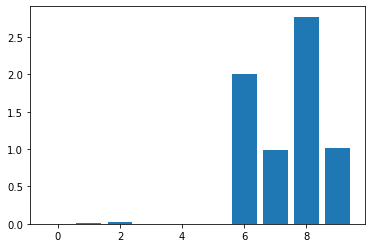

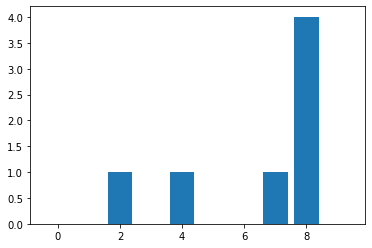

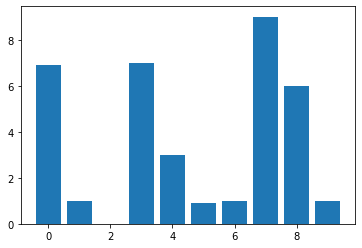

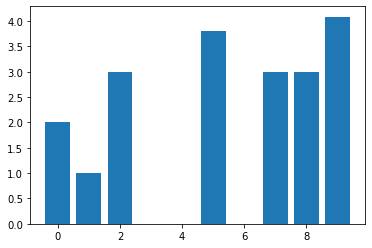

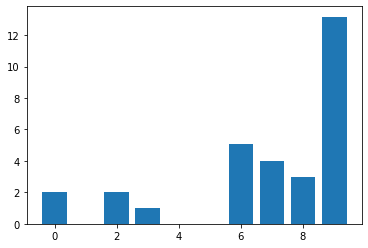

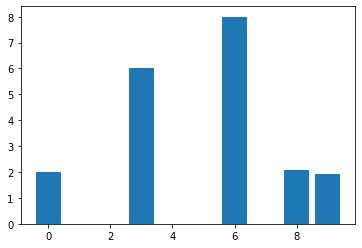

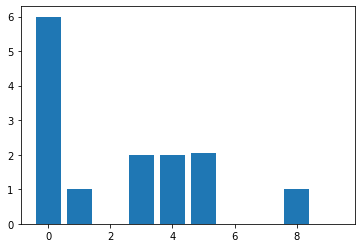

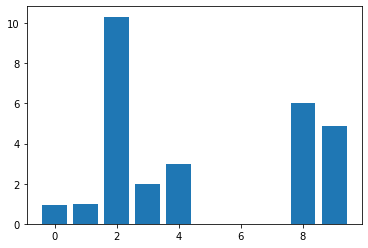

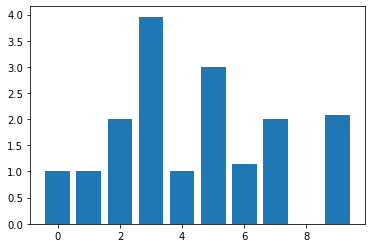

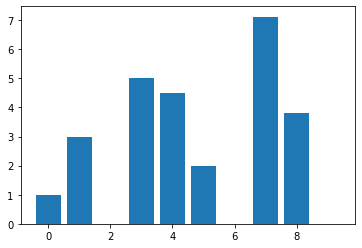

In [103]:

for i in range(10):
    temp = prediction[yt[:,1]==i]
    temp[:,i]=0
    plt.bar(np.arange(10),np.sum(temp, axis=0))
    plt.show()